In [1]:
import torch
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim


In [2]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)

mps


### Load MNIST Dataset

In [3]:
#!pip install --upgrade certifi
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
original_set = torchvision.datasets.MNIST(
    "/tmp",
    download=True, 
    train=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(), 
            transforms.Normalize(0, 1 ),
            transforms.Lambda(lambda x : x.view(-1))

        ]
    )
)

In [5]:
test_set = torchvision.datasets.MNIST(
    "/tmp",
    download=True, 
    train=False,
    transform=transforms.Compose(
        [
            transforms.ToTensor(), 
            transforms.Normalize(0, 1 ), 
            transforms.Lambda(lambda x : x.view(-1))
            
        ]
    )
)

In [6]:
test_set[0][0].shape

torch.Size([784])

In [7]:
examples = {}

In [8]:
for pixels , label in original_set : 
    if examples.get(label) is None: 
        examples[label] = pixels.reshape(28 , 28)
    if len(examples) >= 10 :
        break

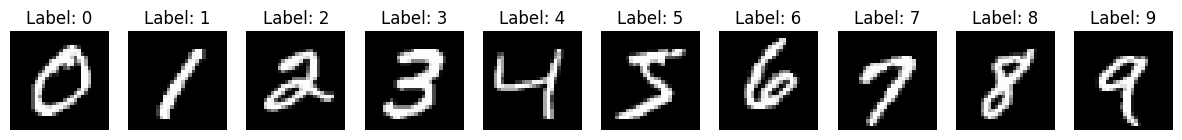

In [9]:
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(examples[i].squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {i}")
    axes[i].axis("off")

plt.show()

In [10]:
class FatAutoEncoder(nn.Module):
    def __init__(self):
        super(FatAutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [11]:

def train_auto_encoder(model, original_set, epochs=20, batch_size=64):
    
    train_loader = DataLoader(original_set, batch_size=batch_size, shuffle=True)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    model.to(device)
    
    loss_history = []
    accuracy_history = []
    
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        
        model.train()
        
        for images, _ in train_loader:
            images = images.to(device)
            

            outputs = model(images)
            loss = criterion(outputs, images)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()

            
            predicted = outputs.round()
            correct += (predicted == images).sum().item()
            total += images.numel()

        
        avg_loss = total_loss / len(train_loader)
        accuracy = correct / total
        
        
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history

In [12]:
fat_model = FatAutoEncoder()
fat_loss, fat_acc = train_auto_encoder(fat_model ,original_set )

Epoch [1/20], Loss: 0.0443, Accuracy: 0.8018
Epoch [2/20], Loss: 0.0345, Accuracy: 0.8052
Epoch [3/20], Loss: 0.0326, Accuracy: 0.8060
Epoch [4/20], Loss: 0.0317, Accuracy: 0.8063
Epoch [5/20], Loss: 0.0311, Accuracy: 0.8065
Epoch [6/20], Loss: 0.0307, Accuracy: 0.8067
Epoch [7/20], Loss: 0.0304, Accuracy: 0.8068
Epoch [8/20], Loss: 0.0301, Accuracy: 0.8068
Epoch [9/20], Loss: 0.0299, Accuracy: 0.8069
Epoch [10/20], Loss: 0.0298, Accuracy: 0.8069
Epoch [11/20], Loss: 0.0296, Accuracy: 0.8070
Epoch [12/20], Loss: 0.0295, Accuracy: 0.8070
Epoch [13/20], Loss: 0.0294, Accuracy: 0.8071
Epoch [14/20], Loss: 0.0293, Accuracy: 0.8071
Epoch [15/20], Loss: 0.0292, Accuracy: 0.8071
Epoch [16/20], Loss: 0.0291, Accuracy: 0.8072
Epoch [17/20], Loss: 0.0290, Accuracy: 0.8072
Epoch [18/20], Loss: 0.0290, Accuracy: 0.8072
Epoch [19/20], Loss: 0.0289, Accuracy: 0.8073
Epoch [20/20], Loss: 0.0288, Accuracy: 0.8073


In [13]:
class ThinAutoEncoder(nn.Module):
    def __init__(self):
        super(ThinAutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 4),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [14]:
thin_model = ThinAutoEncoder()
thin_loss, thin_acc = train_auto_encoder(thin_model ,original_set )

Epoch [1/20], Loss: 0.0597, Accuracy: 0.7979
Epoch [2/20], Loss: 0.0518, Accuracy: 0.7968
Epoch [3/20], Loss: 0.0477, Accuracy: 0.7978
Epoch [4/20], Loss: 0.0461, Accuracy: 0.7982
Epoch [5/20], Loss: 0.0451, Accuracy: 0.7984
Epoch [6/20], Loss: 0.0445, Accuracy: 0.7986
Epoch [7/20], Loss: 0.0441, Accuracy: 0.7986
Epoch [8/20], Loss: 0.0437, Accuracy: 0.7988
Epoch [9/20], Loss: 0.0434, Accuracy: 0.7988
Epoch [10/20], Loss: 0.0431, Accuracy: 0.7989
Epoch [11/20], Loss: 0.0429, Accuracy: 0.7990
Epoch [12/20], Loss: 0.0427, Accuracy: 0.7990
Epoch [13/20], Loss: 0.0425, Accuracy: 0.7991
Epoch [14/20], Loss: 0.0424, Accuracy: 0.7991
Epoch [15/20], Loss: 0.0422, Accuracy: 0.7991
Epoch [16/20], Loss: 0.0421, Accuracy: 0.7992
Epoch [17/20], Loss: 0.0420, Accuracy: 0.7992
Epoch [18/20], Loss: 0.0419, Accuracy: 0.7992
Epoch [19/20], Loss: 0.0418, Accuracy: 0.7993
Epoch [20/20], Loss: 0.0417, Accuracy: 0.7993


### Compare Loss for auto-encoder training

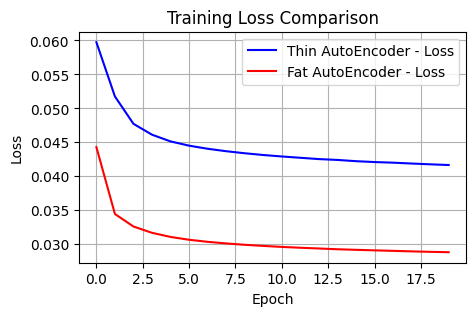

In [15]:
plt.figure(figsize=(5, 3))
plt.plot(thin_loss, label="Thin AutoEncoder - Loss", color="blue")
plt.plot(fat_loss, label="Fat AutoEncoder - Loss", color="red")
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()


### Compare Accuracy for auto-encoder training

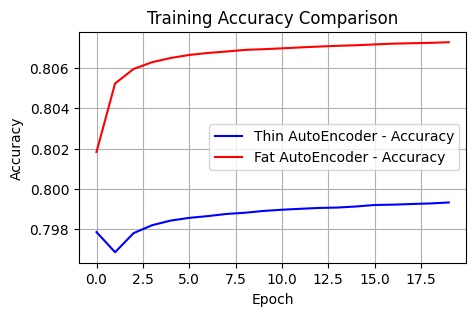

In [16]:

plt.figure(figsize=(5, 3))
plt.plot(thin_acc, label="Thin AutoEncoder - Accuracy", color="blue")
plt.plot(fat_acc, label="Fat AutoEncoder - Accuracy", color="red")
plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.show()

## Classifiers

In [17]:
class FatClassifier(nn.Module):
    def __init__(self, encoder: nn.Sequential):
        super(FatClassifier, self).__init__()
        self.encoder = encoder
        for param in self.encoder.parameters():
            param.requires_grad = False

        self.classifier = nn.Sequential(
                nn.Linear(8, 4),
                nn.ReLU(),
                nn.Linear(4, 10),
                nn.Softmax(dim=1)
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x 

In [18]:
class ThinClassifier(nn.Module):
    def __init__(self,encoder: nn.Sequential):
        super(ThinClassifier, self).__init__()
        self.encoder = encoder
        for param in self.encoder.parameters():
            param.requires_grad = False
    
        self.classifier = nn.Sequential(
            nn.Linear(4, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x

In [19]:
def train_classifier(model, train_set, epochs=20, batch_size=64):
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.classifier.parameters(), lr=1e-3)

    
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    model.to(device)
    
    loss_history = []
    accuracy_history = []
    
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        
        model.train()
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        
        avg_loss = total_loss / len(train_loader)
        accuracy = correct / total
        
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
    
    return loss_history, accuracy_history

#### Fat Classifier

In [20]:
fat_classifier = FatClassifier(fat_model.encoder)

In [21]:
fat_loss_classifier, fat_accuracy_classifier = train_classifier(fat_classifier, original_set)


Epoch [1/20], Loss: 2.1560, Accuracy: 0.3498
Epoch [2/20], Loss: 1.9706, Accuracy: 0.5403
Epoch [3/20], Loss: 1.8891, Accuracy: 0.6108
Epoch [4/20], Loss: 1.8436, Accuracy: 0.6579
Epoch [5/20], Loss: 1.8120, Accuracy: 0.7066
Epoch [6/20], Loss: 1.7884, Accuracy: 0.7243
Epoch [7/20], Loss: 1.7699, Accuracy: 0.7339
Epoch [8/20], Loss: 1.7552, Accuracy: 0.7455
Epoch [9/20], Loss: 1.7435, Accuracy: 0.7585
Epoch [10/20], Loss: 1.7340, Accuracy: 0.7675
Epoch [11/20], Loss: 1.7265, Accuracy: 0.7741
Epoch [12/20], Loss: 1.7203, Accuracy: 0.7784
Epoch [13/20], Loss: 1.7152, Accuracy: 0.7813
Epoch [14/20], Loss: 1.7108, Accuracy: 0.7846
Epoch [15/20], Loss: 1.7072, Accuracy: 0.7852
Epoch [16/20], Loss: 1.7040, Accuracy: 0.7870
Epoch [17/20], Loss: 1.7013, Accuracy: 0.7882
Epoch [18/20], Loss: 1.6989, Accuracy: 0.7886
Epoch [19/20], Loss: 1.6968, Accuracy: 0.7899
Epoch [20/20], Loss: 1.6949, Accuracy: 0.7903


#### Thin Classifier

In [22]:
thin_classifier = ThinClassifier(thin_model.encoder)

In [23]:
thin_loss_classifier, thin_accuracy_classifier = train_classifier(thin_classifier, original_set)


Epoch [1/20], Loss: 2.2632, Accuracy: 0.1918
Epoch [2/20], Loss: 2.1861, Accuracy: 0.2968
Epoch [3/20], Loss: 2.1582, Accuracy: 0.3120
Epoch [4/20], Loss: 2.1372, Accuracy: 0.3515
Epoch [5/20], Loss: 2.1213, Accuracy: 0.3720
Epoch [6/20], Loss: 2.1090, Accuracy: 0.3802
Epoch [7/20], Loss: 2.0990, Accuracy: 0.3935
Epoch [8/20], Loss: 2.0906, Accuracy: 0.4021
Epoch [9/20], Loss: 2.0833, Accuracy: 0.4099
Epoch [10/20], Loss: 2.0769, Accuracy: 0.4163
Epoch [11/20], Loss: 2.0710, Accuracy: 0.4227
Epoch [12/20], Loss: 2.0658, Accuracy: 0.4280
Epoch [13/20], Loss: 2.0611, Accuracy: 0.4325
Epoch [14/20], Loss: 2.0567, Accuracy: 0.4376
Epoch [15/20], Loss: 2.0527, Accuracy: 0.4435
Epoch [16/20], Loss: 2.0489, Accuracy: 0.4485
Epoch [17/20], Loss: 2.0455, Accuracy: 0.4509
Epoch [18/20], Loss: 2.0423, Accuracy: 0.4536
Epoch [19/20], Loss: 2.0393, Accuracy: 0.4558
Epoch [20/20], Loss: 2.0365, Accuracy: 0.4569


### Compare Loss for training Classifiers

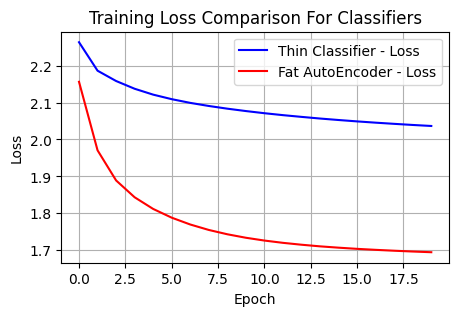

In [24]:
plt.figure(figsize=(5, 3))
plt.plot(thin_loss_classifier, label="Thin Classifier - Loss", color="blue")
plt.plot(fat_loss_classifier, label="Fat AutoEncoder - Loss", color="red")
plt.title("Training Loss Comparison For Classifiers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()


### Compare Accuracy for training Classifiers

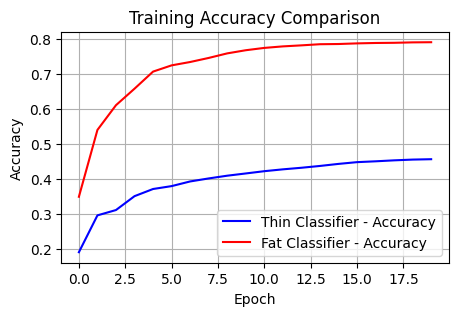

In [25]:

plt.figure(figsize=(5, 3))
plt.plot(thin_accuracy_classifier, label="Thin Classifier - Accuracy", color="blue")
plt.plot(fat_accuracy_classifier, label="Fat Classifier - Accuracy", color="red")
plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.show()

## Lets Evaluate Models 

In [26]:
class WrongPrediction:
    def __init__(self, true_label , predicted_label , image):
        self.true_label = true_label
        self.predicted_label = predicted_label
        self.image = image
        

In [27]:

def evaluate_classifier(model, test_set, batch_size=64):
    wrong_answers = []  # To store wrong predictions
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)
    criterion = nn.CrossEntropyLoss()
    
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
            wrong_indices = (predicted != labels).nonzero(as_tuple=True)[0]
            for i in wrong_indices:
                wrong_answers.append(
                    WrongPrediction(
                        true_label=labels[i].item(),
                        predicted_label=predicted[i].item(),
                        image=images[i].reshape(28 , 28 ).cpu()  
                    )
                )
    
    avg_loss = total_loss / len(test_loader)
    accuracy = correct / total
    
    print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}")
    
    return avg_loss, accuracy, wrong_answers

In [28]:
fat_test_loss, fat_test_accuracy, fat_wrong_answers = evaluate_classifier(fat_classifier, test_set)

Test Loss: 1.6944, Test Accuracy: 0.7911


In [29]:
thin_test_loss, thin_test_accuracy, thin_wrong_answers = evaluate_classifier(thin_classifier, test_set)

Test Loss: 2.0342, Test Accuracy: 0.4585


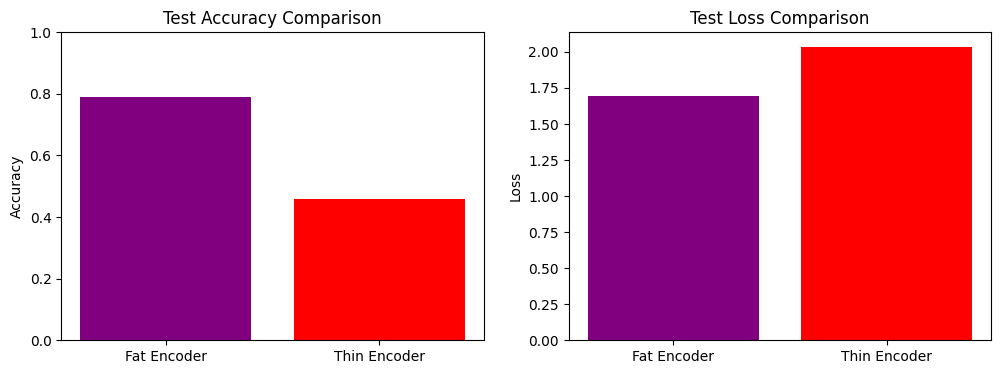

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(["Fat Encoder", "Thin Encoder"], [fat_test_accuracy, thin_test_accuracy], color=["purple", "red"])
ax[0].set_title("Test Accuracy Comparison")
ax[0].set_ylabel("Accuracy")
ax[0].set_ylim(0, 1)

ax[1].bar(["Fat Encoder", "Thin Encoder"], [fat_test_loss, thin_test_loss], color=["purple", "red"])
ax[1].set_title("Test Loss Comparison")
ax[1].set_ylabel("Loss")

plt.show()

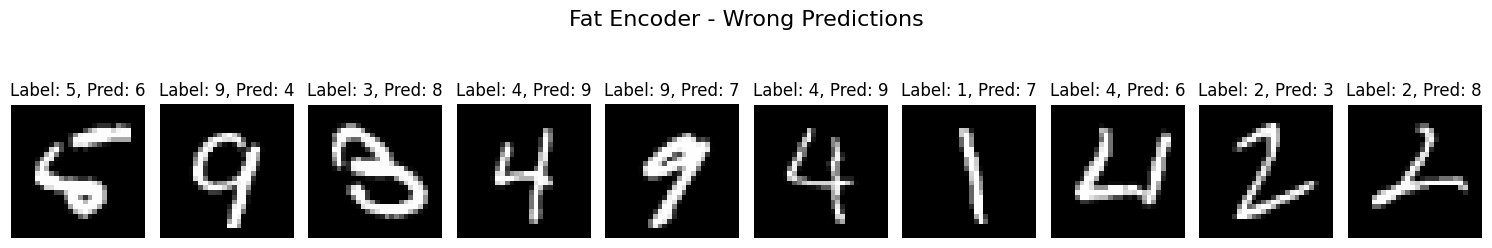

In [31]:
def plot_wrong_answers(wrong_answers, title, n=10):
    fig, ax = plt.subplots(1, n, figsize=(15, 3))
    fig.suptitle(title, fontsize=16)
    
    for i in range(n):
        if i < len(wrong_answers):
            wrong = wrong_answers[i]
            ax[i].imshow(wrong.image.view(28, 28), cmap="gray")
            ax[i].set_title(f"Label: {wrong.true_label}, Pred: {wrong.predicted_label}")
            ax[i].axis('off')
        else:
            ax[i].axis('off') 
    
    plt.tight_layout()
    plt.show()


plot_wrong_answers(fat_wrong_answers, "Fat Encoder - Wrong Predictions", n=10)


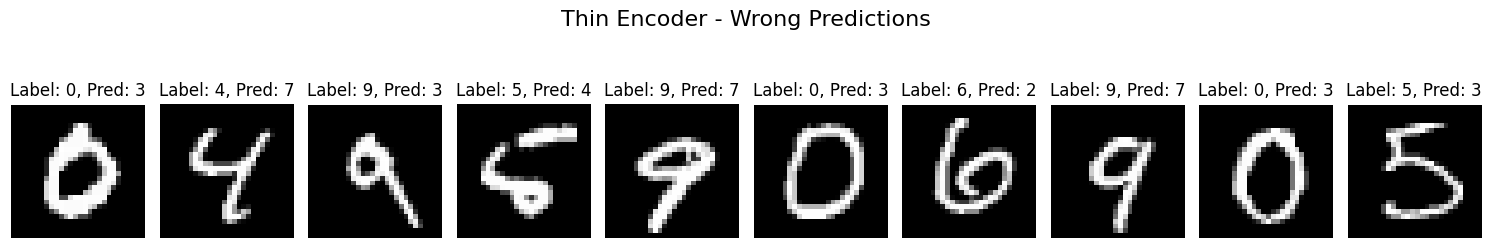

In [32]:
plot_wrong_answers(thin_wrong_answers, "Thin Encoder - Wrong Predictions", n=10)

# Better model with the analyzed hyper params 

In [33]:
class BetterAutoEncoder(nn.Module):
    def __init__(self):
        super(BetterAutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [34]:
better_model = BetterAutoEncoder()
better_loss, better_acc = train_auto_encoder(better_model ,original_set)

Epoch [1/20], Loss: 0.0289, Accuracy: 0.8089
Epoch [2/20], Loss: 0.0150, Accuracy: 0.8139
Epoch [3/20], Loss: 0.0120, Accuracy: 0.8146
Epoch [4/20], Loss: 0.0104, Accuracy: 0.8149
Epoch [5/20], Loss: 0.0094, Accuracy: 0.8150
Epoch [6/20], Loss: 0.0087, Accuracy: 0.8151
Epoch [7/20], Loss: 0.0082, Accuracy: 0.8151
Epoch [8/20], Loss: 0.0078, Accuracy: 0.8152
Epoch [9/20], Loss: 0.0075, Accuracy: 0.8152
Epoch [10/20], Loss: 0.0071, Accuracy: 0.8152
Epoch [11/20], Loss: 0.0069, Accuracy: 0.8153
Epoch [12/20], Loss: 0.0067, Accuracy: 0.8153
Epoch [13/20], Loss: 0.0065, Accuracy: 0.8153
Epoch [14/20], Loss: 0.0063, Accuracy: 0.8153
Epoch [15/20], Loss: 0.0061, Accuracy: 0.8153
Epoch [16/20], Loss: 0.0060, Accuracy: 0.8153
Epoch [17/20], Loss: 0.0058, Accuracy: 0.8153
Epoch [18/20], Loss: 0.0057, Accuracy: 0.8153
Epoch [19/20], Loss: 0.0056, Accuracy: 0.8154
Epoch [20/20], Loss: 0.0055, Accuracy: 0.8154


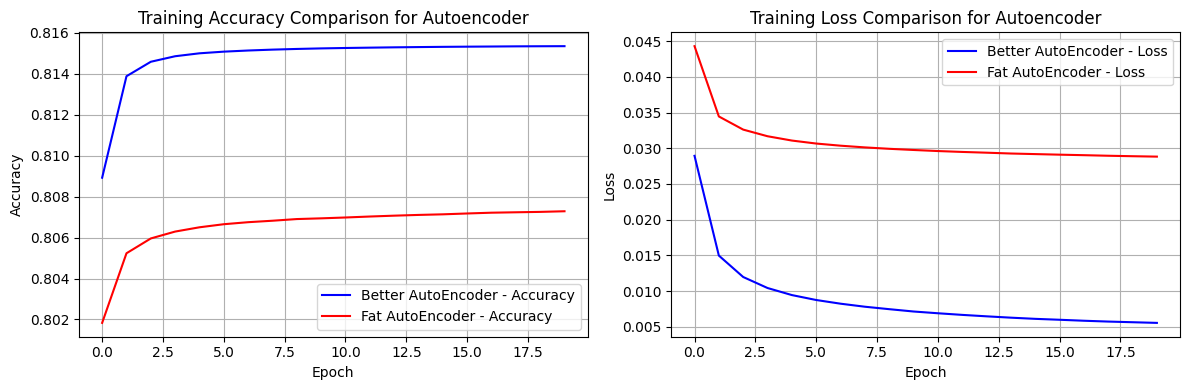

In [45]:

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Accuracy
ax[0].plot(better_acc, label="Better AutoEncoder - Accuracy", color="blue")
ax[0].plot(fat_acc, label="Fat AutoEncoder - Accuracy", color="red")
ax[0].set_title("Training Accuracy Comparison for Autoencoder")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].legend()
ax[0].grid()

# Plot Loss
ax[1].plot(better_loss, label="Better AutoEncoder - Loss", color="blue")
ax[1].plot(fat_loss, label="Fat AutoEncoder - Loss", color="red")
ax[1].set_title("Training Loss Comparison for Autoencoder")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend()
ax[1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


In [38]:
class BetterClassifier(nn.Module):
    def __init__(self, encoder: nn.Sequential):
        super(BetterClassifier, self).__init__()
        self.encoder = encoder
        for param in self.encoder.parameters():
            param.requires_grad = False

        self.classifier = nn.Sequential(
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 10),
                nn.Softmax(dim=1)
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x 

In [39]:
better_classifier = BetterClassifier(encoder=better_model.encoder)

In [40]:
better_loss_classifier, better_accuracy_classifier = train_classifier(better_classifier, original_set)

Epoch [1/20], Loss: 1.8507, Accuracy: 0.6743
Epoch [2/20], Loss: 1.6035, Accuracy: 0.8905
Epoch [3/20], Loss: 1.5779, Accuracy: 0.9010
Epoch [4/20], Loss: 1.5688, Accuracy: 0.9059
Epoch [5/20], Loss: 1.5627, Accuracy: 0.9097
Epoch [6/20], Loss: 1.5594, Accuracy: 0.9107
Epoch [7/20], Loss: 1.5563, Accuracy: 0.9131
Epoch [8/20], Loss: 1.5533, Accuracy: 0.9152
Epoch [9/20], Loss: 1.5513, Accuracy: 0.9169
Epoch [10/20], Loss: 1.5492, Accuracy: 0.9186
Epoch [11/20], Loss: 1.5473, Accuracy: 0.9188
Epoch [12/20], Loss: 1.5454, Accuracy: 0.9210
Epoch [13/20], Loss: 1.5440, Accuracy: 0.9223
Epoch [14/20], Loss: 1.5428, Accuracy: 0.9233
Epoch [15/20], Loss: 1.5405, Accuracy: 0.9253
Epoch [16/20], Loss: 1.5392, Accuracy: 0.9262
Epoch [17/20], Loss: 1.5378, Accuracy: 0.9272
Epoch [18/20], Loss: 1.5362, Accuracy: 0.9296
Epoch [19/20], Loss: 1.5348, Accuracy: 0.9302
Epoch [20/20], Loss: 1.5330, Accuracy: 0.9322


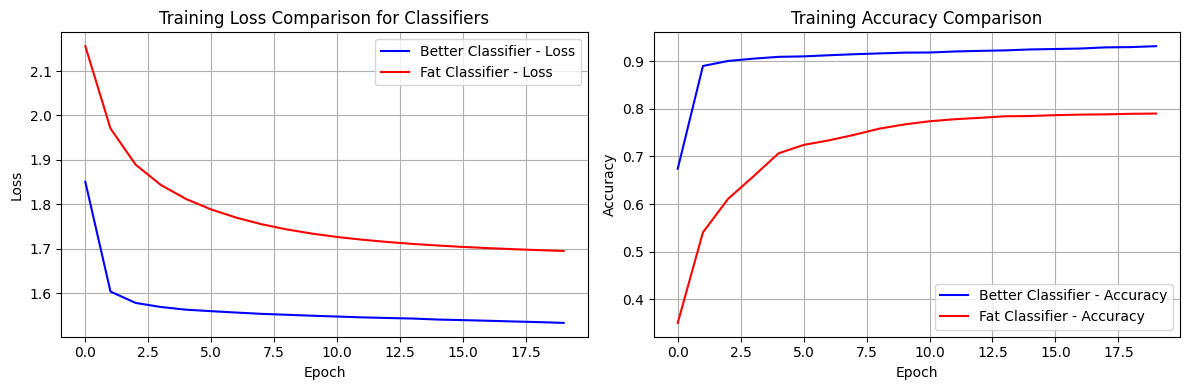

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))


ax[0].plot(better_loss_classifier, label="Better Classifier - Loss", color="blue")
ax[0].plot(fat_loss_classifier, label="Fat Classifier - Loss", color="red")
ax[0].set_title("Training Loss Comparison for Classifiers")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].grid()


ax[1].plot(better_accuracy_classifier, label="Better Classifier - Accuracy", color="blue")
ax[1].plot(fat_accuracy_classifier, label="Fat Classifier - Accuracy", color="red")
ax[1].set_title("Training Accuracy Comparison")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[1].grid()


plt.tight_layout()

plt.show()


In [43]:
better_test_loss, better_test_accuracy, better_wrong_answers = evaluate_classifier(better_classifier, test_set)

Test Loss: 1.5318, Test Accuracy: 0.9326


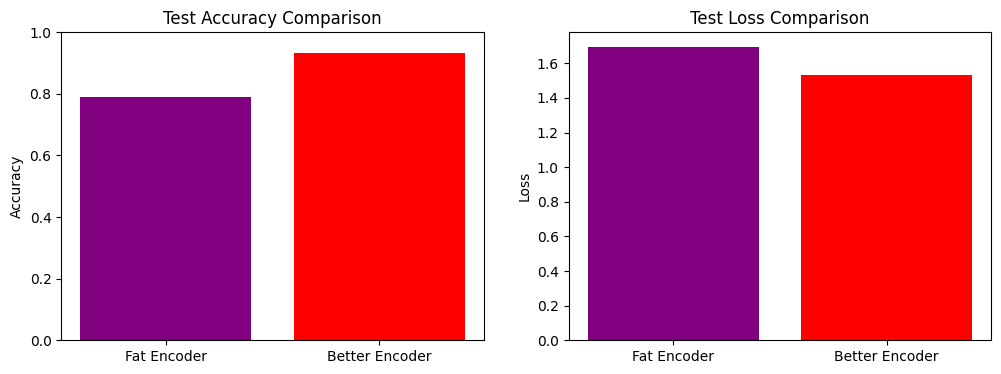

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(["Fat Encoder", "Better Encoder"], [fat_test_accuracy, better_test_accuracy], color=["purple", "red"])
ax[0].set_title("Test Accuracy Comparison")
ax[0].set_ylabel("Accuracy")
ax[0].set_ylim(0, 1)

ax[1].bar(["Fat Encoder", "Better Encoder"], [fat_test_loss, better_test_loss], color=["purple", "red"])
ax[1].set_title("Test Loss Comparison")
ax[1].set_ylabel("Loss")

plt.show()